Next we take a look at the procedure events table. <br>
We start by importing the libraries that we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
procedures_mv_df = pd.read_csv('../Extracted CSVs/PROCEDUREEVENTS_MV.csv')

In [3]:
procedures_mv_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [4]:
from datetime import datetime

In the next few code cells, we find out more information about the length of the procedure.

In [5]:
procedures_mv_df['CON START'] = pd.to_datetime(procedures_mv_df['STARTTIME'], format='%Y-%m-%d %H:%M:%S')

In [6]:
procedures_mv_df['CON END'] = pd.to_datetime(procedures_mv_df['ENDTIME'], format='%Y-%m-%d %H:%M:%S')

In [7]:
procedures_mv_df['LENGTH']=procedures_mv_df['CON END']-procedures_mv_df['CON START']

In [8]:
procedures_mv_df['LENGTH'].describe()

count                       258066
mean     0 days 22:08:16.476947757
std      2 days 04:04:26.364745669
min              -1 days +23:31:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                1 days 00:40:00
max               93 days 22:27:00
Name: LENGTH, dtype: object

In [9]:
procedures_mv_df['LENGTH'].head(10)

0   0 days 00:01:00
1   0 days 00:01:00
2   5 days 20:56:00
3   0 days 00:01:00
4   3 days 14:33:00
5   0 days 00:01:00
6   0 days 00:01:00
7   0 days 00:01:00
8   0 days 00:01:00
9   0 days 00:01:00
Name: LENGTH, dtype: timedelta64[ns]

Let's find out on what part of the body these procedures took place.

In [10]:
procedures_mv_df['LOCATION'].value_counts()

Right IJ                6219
Right Radial            4881
Left Radial             3732
Right Antecubital       3110
Left Antecubital        2867
                        ... 
Left Foot                  2
Right Side Head            2
Right Upper Quadrant       1
Right Ulnar                1
Left Side Head             1
Name: LOCATION, Length: 97, dtype: int64

In [11]:
procedures_mv_df['LOCATION'].value_counts().head(10)

Right IJ                    6219
Right Radial                4881
Left Radial                 3732
Right Antecubital           3110
Left Antecubital            2867
Left Cephalic Lower Arm     2172
Right Cephalic Lower Arm    1871
Left Metacarpal             1713
Right Metacarpal            1638
Left Basilic Lower Arm      1583
Name: LOCATION, dtype: int64

<AxesSubplot:>

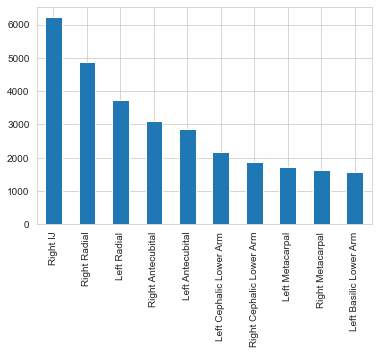

In [12]:
procedures_mv_df['LOCATION'].value_counts().head(10).plot(kind='bar')

In [13]:
procedures_mv_df['ORDERCATEGORYNAME'].value_counts()


Procedures               66495
Peripheral Lines         61503
Imaging                  46310
Invasive Lines           35751
Intubation/Extubation    12842
Ventilation              12160
Significant Events        9913
Communication             8560
Continuous Procedures     2195
Dialysis                  1985
Peritoneal Dialysis        226
CRRT Filter Change         126
Name: ORDERCATEGORYNAME, dtype: int64

These are the order category that these procedures belong to.

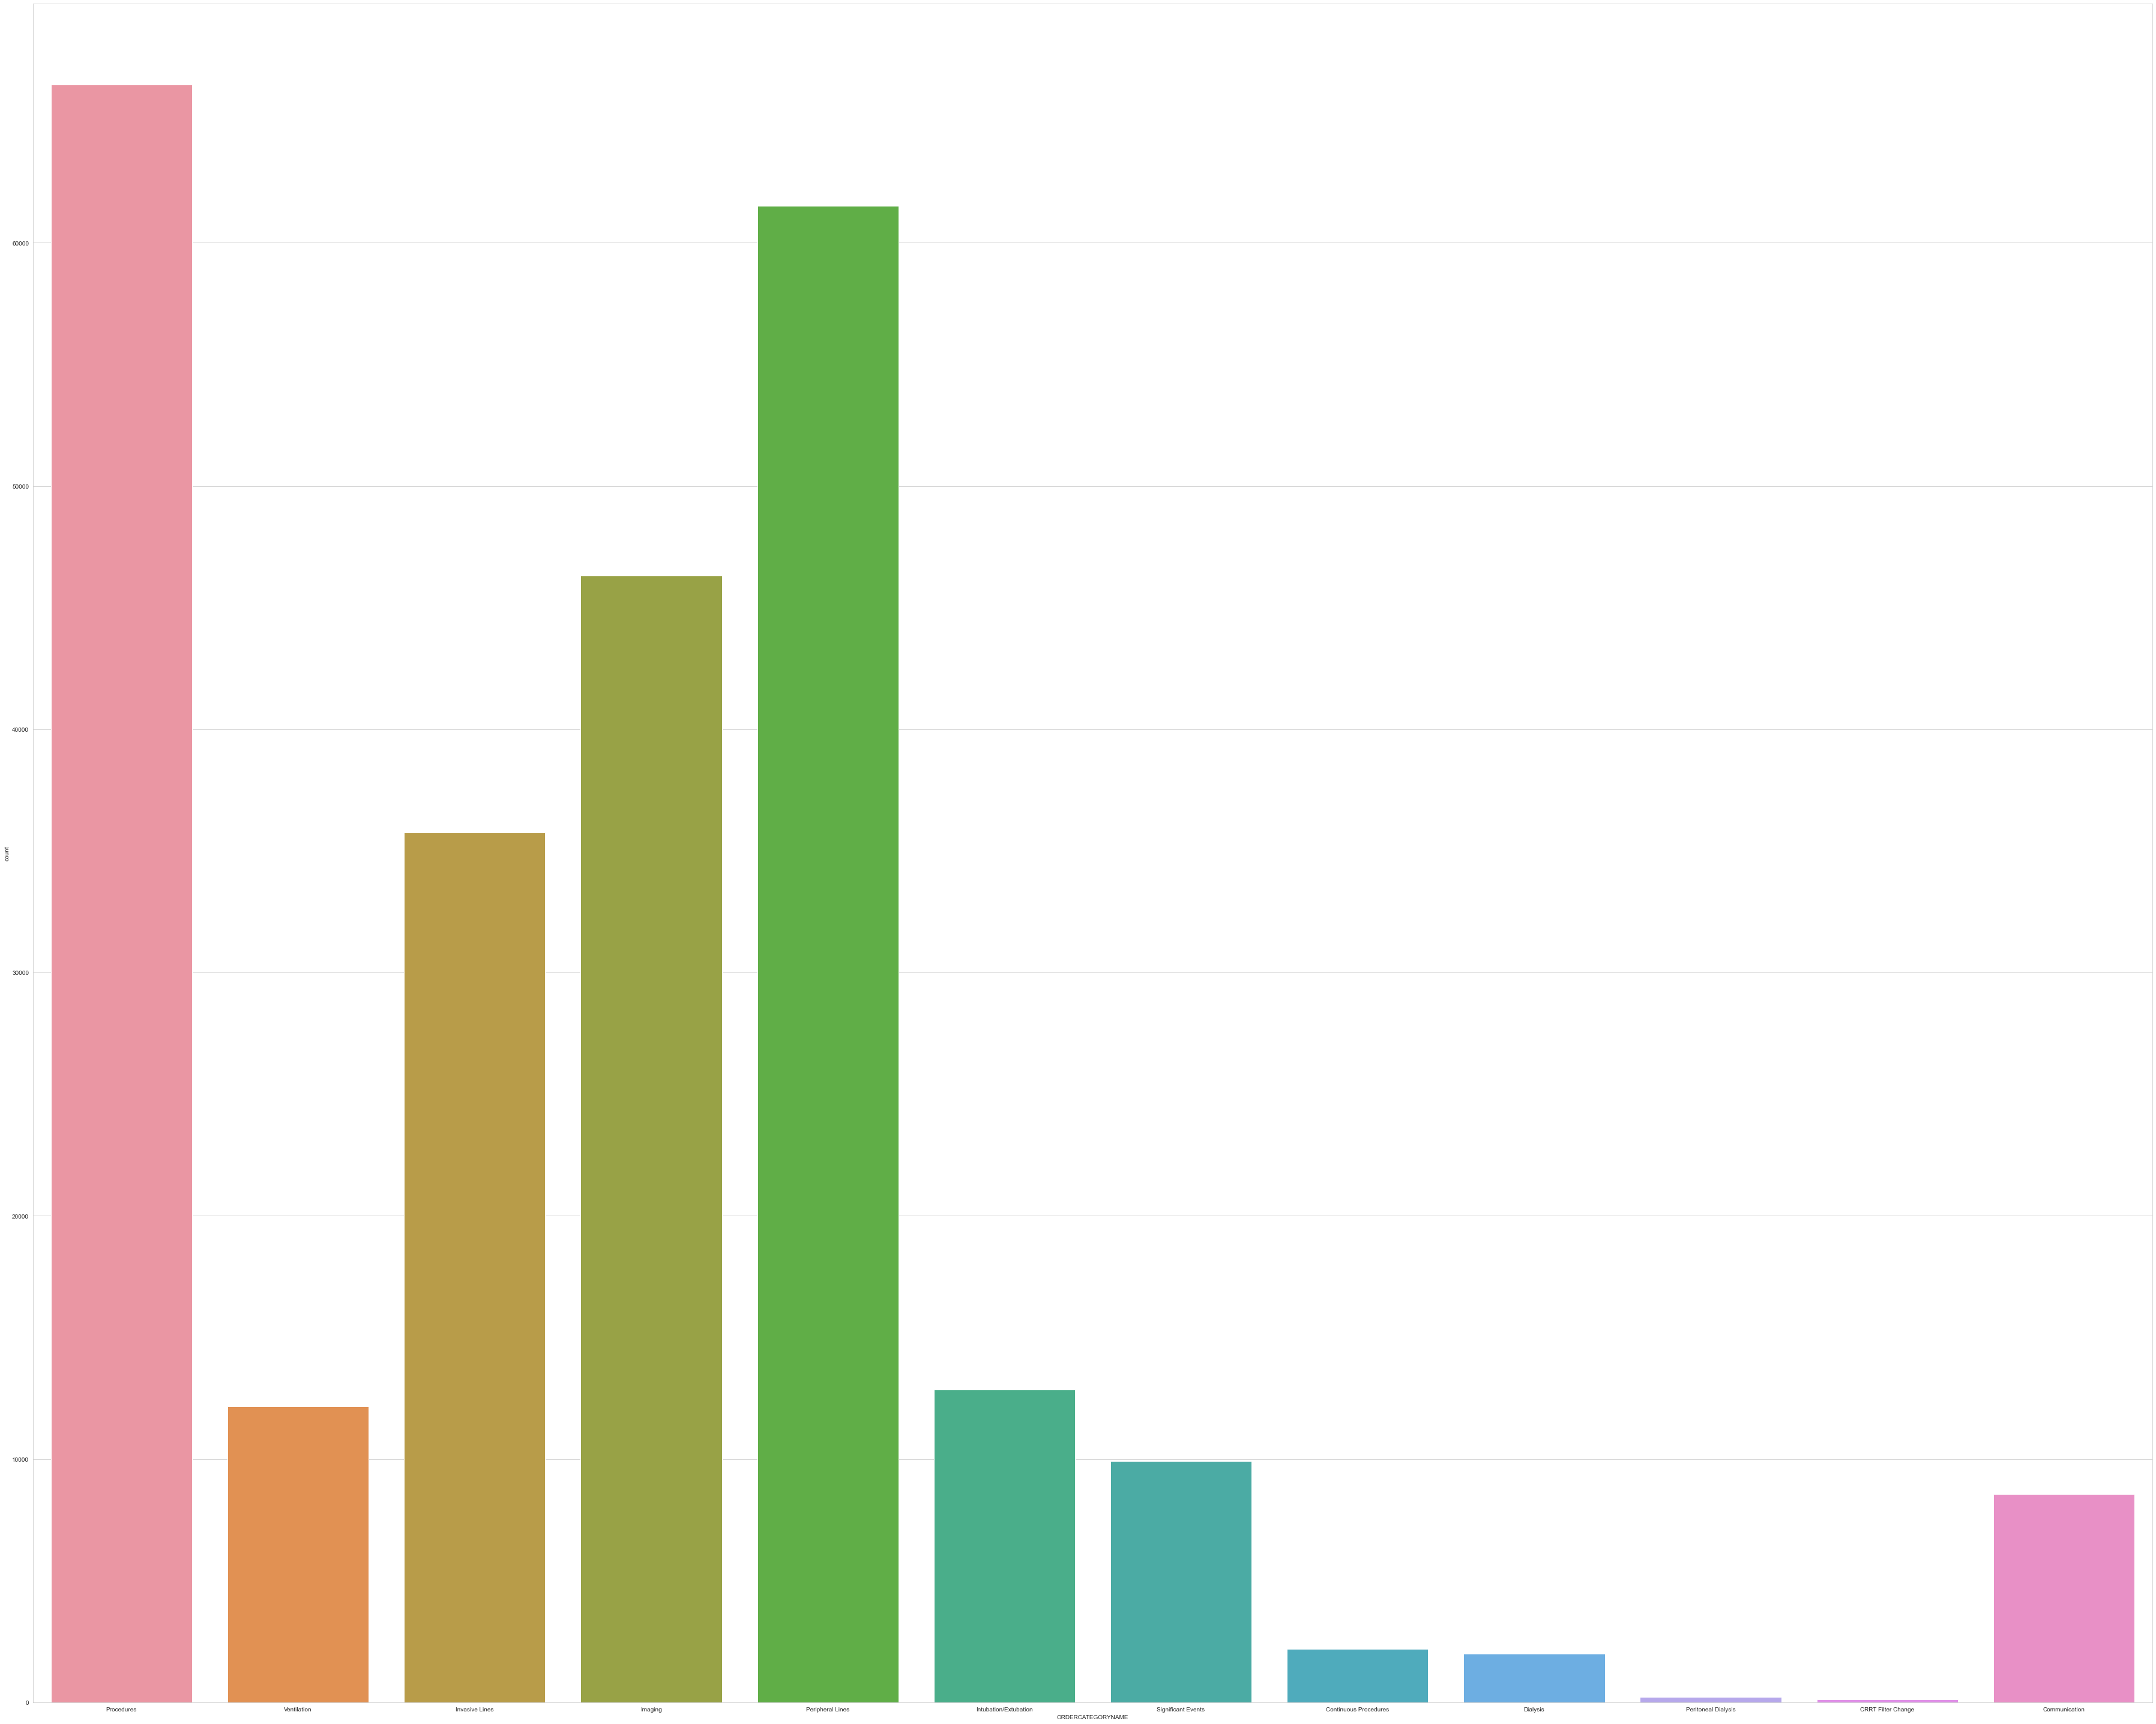

In [16]:
plt.figure(figsize=(50,40))
sns.countplot(x = procedures_mv_df['ORDERCATEGORYNAME'])
plt.tight_layout()

Let's find out more about these order categories.

In [19]:
procedures_mv_df.groupby(['ORDERCATEGORYNAME', 'ORDERCATEGORYDESCRIPTION']).count()['ROW_ID']

ORDERCATEGORYNAME      ORDERCATEGORYDESCRIPTION
CRRT Filter Change     Electrolytes                  126
Communication          Electrolytes                 8560
Continuous Procedures  Task                         2195
Dialysis               Task                         1985
Imaging                Electrolytes                46310
Intubation/Extubation  Electrolytes                12842
Invasive Lines         Task                        35751
Peripheral Lines       Task                        61503
Peritoneal Dialysis    Task                          226
Procedures             Electrolytes                66495
Significant Events     Electrolytes                 9913
Ventilation            Task                        12160
Name: ROW_ID, dtype: int64

We can see that all of these procedures are of two types, Electrolytes or Task.

([<matplotlib.patches.Wedge at 0x123083bcfa0>,
 [Text(-0.2025540866344767, 1.0811900119718427, 'Electrolytes'),
  Text(0.20255398540616112, -1.08119003093632, 'Task')])

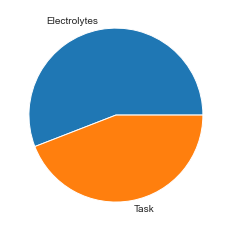

In [20]:
plt.pie(procedures_mv_df['ORDERCATEGORYDESCRIPTION'].value_counts(), labels = 'Electrolytes Task'.split())

Let's find out more about the status of these procedures.

In [21]:
procedures_mv_df['STATUSDESCRIPTION'].value_counts()

FinishedRunning    246430
Rewritten            8590
Stopped              2846
Paused                200
Name: STATUSDESCRIPTION, dtype: int64

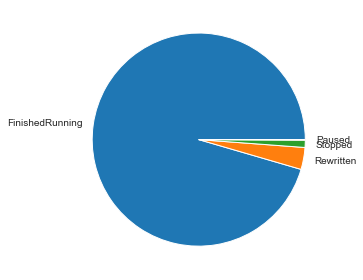

In [22]:
plt.pie(procedures_mv_df['STATUSDESCRIPTION'].value_counts(), labels = 'FinishedRunning Rewritten Stopped Paused'.split())
plt.tight_layout()

With this, the **Critical Care Unit** section comes to an end. The tables are summarised below. <br>
**CAREGIVERS**: Every caregiver who has recorded data in the database (defines CGID) <br>
**CHARTEVENTS**: All charted observations for patients <br>
**DATETIMEEVENTS**: All recorded observations which are dates, for example time of dialysis or insertion of lines. <br>
**INPUTEVENTS_CV**: Intake for patients monitored using the Philips CareVue system while in the ICU <br>
**INPUTEVENTS_MV**: Intake for patients monitored using the iMDSoft Metavision system while in the ICU <br>
**NOTEEVENTS**: Deidentified notes, including nursing and physician notes, ECG reports, imaging reports, and discharge summaries. <br>
**OUTPUTEVENTS**: Output information for patients while in the ICU <br>
**PROCEDUREEVENTS_MV**: Patient procedures for the subset of patients who were monitored in the ICU using the iMDSoft MetaVision system. <br>